<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [ ]:

# Define the file path
file_path = r'C:\\Users\\Dominic\\Downloads\\trial 1\\Raw Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the DataFrame to include only the data between 0.5 seconds and 20.36 seconds
df_trimmed = df[(df['Time (s)'] > 0.5) & (df['Time (s)'] <= 20.36)]


df_trimmed['Velocity x (m/s)'] = df_trimmed['Rotation x (rad/s)'] * 0.8477
df_trimmed['Velocity y (m/s)'] = df_trimmed['Rotation y (rad/s)'] * 0.8477
df_trimmed['Velocity z (m/s)'] = df_trimmed['Rotation z (rad/s)'] * 0.8477
# the .0405 uses the rolling condition to translate the angular velocity to linear velocity by using the length of the string as the radius of the circle (40.5 cm)




C:\Users\Dominic\AppData\Local\Temp\ipykernel_47960\3478645664.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['Velocity x (m/s)'] = df_trimmed['Rotation x (rad/s)'] * 0.8477
C:\Users\Dominic\AppData\Local\Temp\ipykernel_47960\3478645664.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['Velocity y (m/s)'] = df_trimmed['Rotation y (rad/s)'] * 0.8477
C:\Users\Dominic\AppData\Local\Temp\ipykernel_47960\3478645664.py:13: SettingWithCopyWarning: 
A value is trying to be set on a co

## Curve Fitting ##

In [ ]:
# Define the sine and cosine functions for curve fitting
def sin_func(t, A, omega, phi):
    return A * np.sin(omega * t + phi)

def cos_func(t, A, omega, phi):
    return A * np.cos(omega * t + phi)

"""these create the sine and cosine functions for curve fitting
inputs:
    t: time values
    A: amplitude
    omega: angular frequency
    phi: phase
outputs:
    A * np.sin(omega * t + phi): the sine function
    A * np.cos(omega * t + phi): the cosine function"""

def calculate_residuals(params, t, data, func):
    A, omega, phi = params
    return np.sum((data - func(t, A, omega, phi))**2)
"""This function calculates the sum of squared residuals to identify the best fit parameters for the sine and cosine functions
inputs:
    params: the parameters for the sine or cosine function
    t: time values
    data: the velocity data
    func: the sine or cosine function"""
omega_guesses = np.linspace(0.1, 10, 100)

# Fit the curves to the sine function and find the best fit based on the deviation from the data
time = df_trimmed['Time (s)']
best_fit_params_x = None
best_fit_params_y = None
best_fit_params_z = None
best_fit_params_net = None
min_residuals_x = float('inf')
min_residuals_y = float('inf')
min_residuals_z = float('inf')
min_residuals_net = float('inf')

for omega_guess in omega_guesses:
    try:
        popt_x, _ = curve_fit(sin_func, time, df_trimmed['Velocity x (m/s)'], p0=[1, omega_guess, 0])
        residuals_x = calculate_residuals(popt_x, time, df_trimmed['Velocity x (m/s)'], sin_func)
        if residuals_x < min_residuals_x:
            min_residuals_x = residuals_x
            best_fit_params_x = popt_x

        popt_y, _ = curve_fit(sin_func, time, df_trimmed['Velocity y (m/s)'], p0=[1, omega_guess, 0])
        residuals_y = calculate_residuals(popt_y, time, df_trimmed['Velocity y (m/s)'], sin_func)
        if residuals_y < min_residuals_y:
            min_residuals_y = residuals_y
            best_fit_params_y = popt_y

        popt_z, _ = curve_fit(sin_func, time, df_trimmed['Velocity z (m/s)'], p0=[1, omega_guess, 0])
        residuals_z = calculate_residuals(popt_z, time, df_trimmed['Velocity z (m/s)'], sin_func)
        if residuals_z < min_residuals_z:
            min_residuals_z = residuals_z
            best_fit_params_z = popt_z

    except RuntimeError:
        # Ignore the cases where the curve fitting fails
        continue

"""This for loop find the best paratmters to fit the x,y,and z velocity functions to a the sin function V=Asin(wt+phi)
omega ranges from 0.1 to 10

inputs:
    omega_guess: a list of guesses for omega
    time: the time values
    df_trimmed['Velocity x (m/s)']: the x velocity values
    df_trimmed['Velocity y (m/s)']: the y velocity values
    df_trimmed['Velocity z (m/s)']: the z velocity values

 Outputs:
    best_fit_params_x: the best fit parameters for the x velocity
    best_fit_params_y: the best fit parameters for the y velocity
    best_fit_params_z: the best fit parameters for the z velocity
    best_fit_params_net: the best fit parameters for the net velocity
    min_residuals_x: the minimum residuals for the x velocity
    min_residuals_y: the minimum residuals for the y velocity
    min_residuals_z: the minimum residuals for the z velocity


"""

"This for loop find the best paratmters to fit the x,y,and z velocity functions to a the sin function V=Asin(wt+phi)\nomega ranges from 0.1 to 10\n\ninputs:\n    omega_guess: a list of guesses for omega\n    time: the time values\n    df_trimmed['Velocity x (m/s)']: the x velocity values\n    df_trimmed['Velocity y (m/s)']: the y velocity values\n    df_trimmed['Velocity z (m/s)']: the z velocity values\n\n Outputs:\n    best_fit_params_x: the best fit parameters for the x velocity\n    best_fit_params_y: the best fit parameters for the y velocity\n    best_fit_params_z: the best fit parameters for the z velocity\n    best_fit_params_net: the best fit parameters for the net velocity\n    min_residuals_x: the minimum residuals for the x velocity\n    min_residuals_y: the minimum residuals for the y velocity\n    min_residuals_z: the minimum residuals for the z velocity\n\n\n"

## Plotting Velocities ##

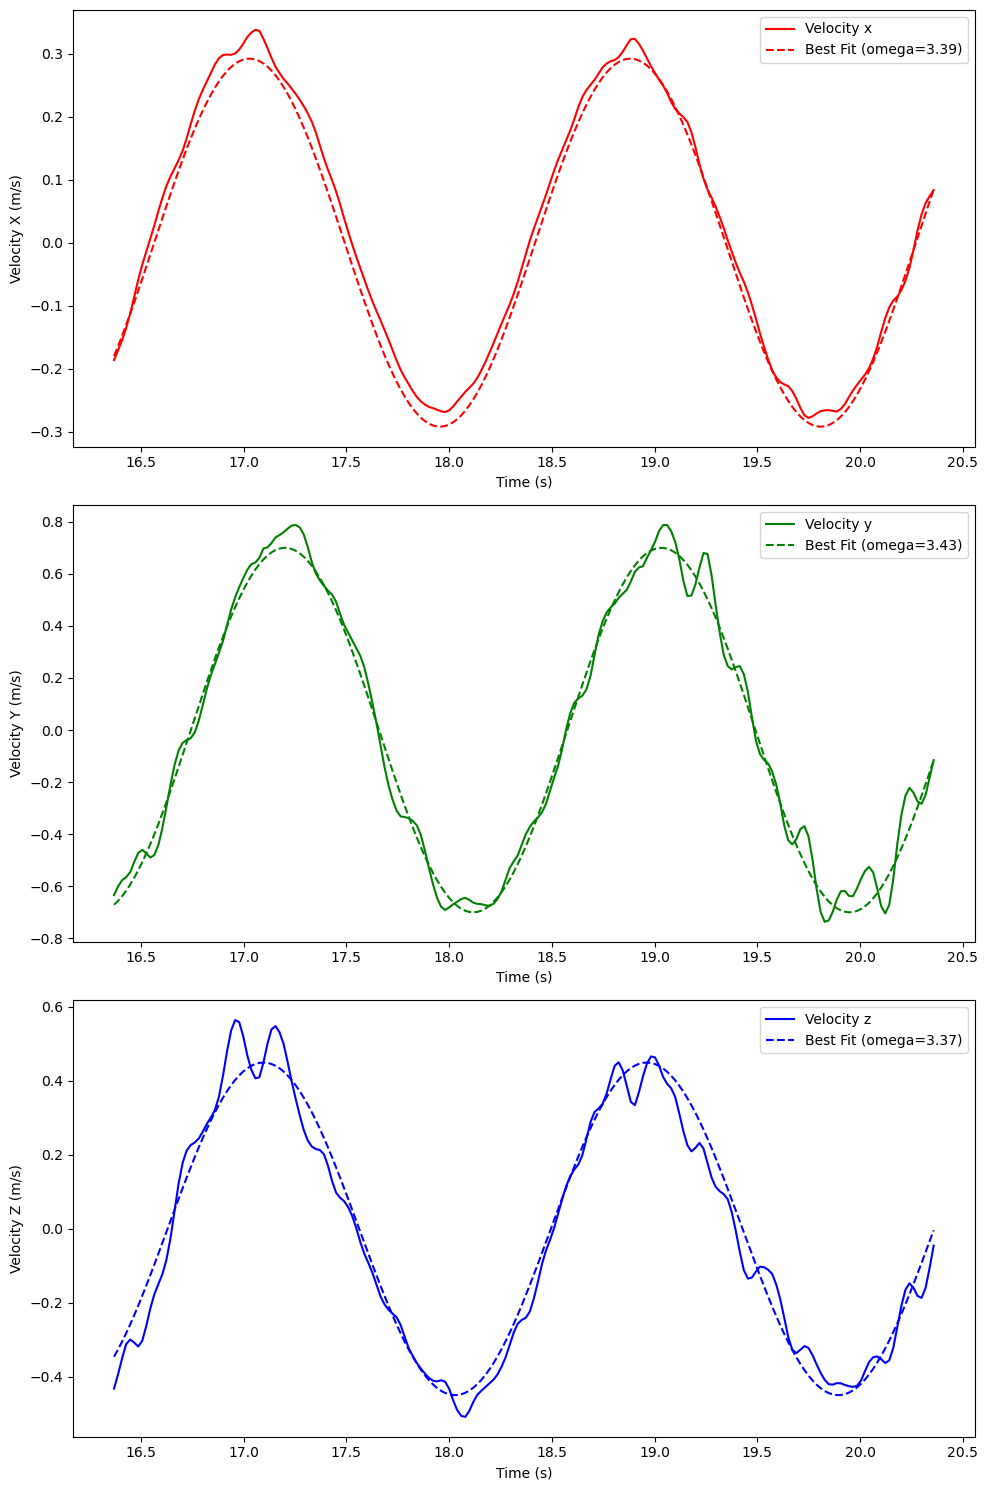

In [ ]:

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the x-axis velocity and best fitted curve
axs[0].plot(time, df_trimmed['Velocity x (m/s)'], color='r', label='Velocity x')
axs[0].plot(time, sin_func(time, *best_fit_params_x), 'r--', label=f'Best Fit (omega={best_fit_params_x[1]:.2f})')
axs[0].set_ylabel('Velocity X (m/s)')
axs[0].set_xlabel('Time (s)')
axs[0].legend()

# Plot the y-axis velocity and best fitted curve
axs[1].plot(time, df_trimmed['Velocity y (m/s)'], color='g', label='Velocity y')
axs[1].plot(time, sin_func(time, *best_fit_params_y), 'g--', label=f'Best Fit (omega={best_fit_params_y[1]:.2f})')
axs[1].set_ylabel('Velocity Y (m/s)')
axs[1].set_xlabel('Time (s)')
axs[1].legend()

# Plot the z-axis velocity and best fitted curve
axs[2].plot(time, df_trimmed['Velocity z (m/s)'], color='b', label='Velocity z')
axs[2].plot(time, sin_func(time, *best_fit_params_z), 'b--', label=f'Best Fit (omega={best_fit_params_z[1]:.2f})')
axs[2].set_ylabel('Velocity Z (m/s)')
axs[2].set_xlabel('Time (s)')
axs[2].legend()


plt.tight_layout()

plt.show()

## Plotting Acceleration ##

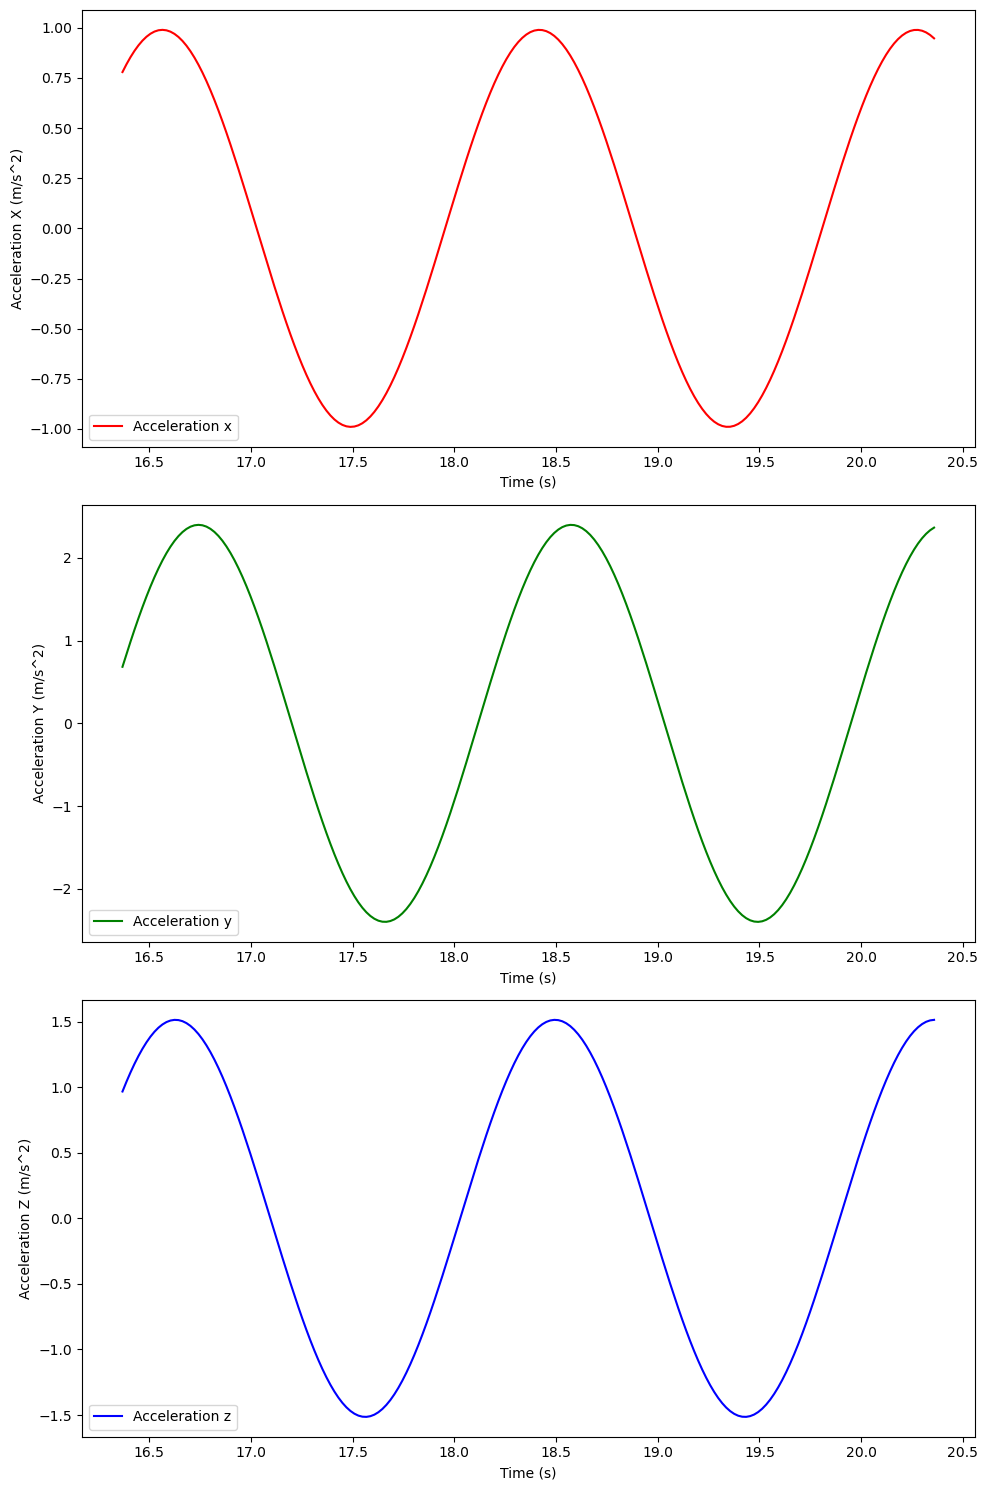

In [ ]:
# Define the derivative of the sine function for acceleration
def sin_derivative(t, A, omega, phi):
    return A * omega * np.cos(omega * t + phi)

# Calculate the accelerations using the best fit parameters
acceleration_x = sin_derivative(time, *best_fit_params_x)
acceleration_y = sin_derivative(time, *best_fit_params_y)
acceleration_z = sin_derivative(time, *best_fit_params_z)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the x-axis acceleration
axs[0].plot(time, acceleration_x, color='r', label='Acceleration x')
axs[0].set_ylabel('Acceleration X (m/s^2)')
axs[0].set_xlabel('Time (s)')
axs[0].legend()

# Plot the y-axis acceleration
axs[1].plot(time, acceleration_y, color='g', label='Acceleration y')
axs[1].set_ylabel('Acceleration Y (m/s^2)')
axs[1].set_xlabel('Time (s)')
axs[1].legend()

# Plot the z-axis acceleration
axs[2].plot(time, acceleration_z, color='b', label='Acceleration z')
axs[2].set_ylabel('Acceleration Z (m/s^2)')
axs[2].set_xlabel('Time (s)')
axs[2].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
amplitude_acceleration_x = best_fit_params_x[0] * best_fit_params_x[1]
amplitude_acceleration_y = best_fit_params_y[0] * best_fit_params_y[1]
amplitude_acceleration_z = best_fit_params_z[0] * best_fit_params_z[1]

# Calculate the square root of the sum of the squares of the amplitudes
net_amplitude_acceleration = np.sqrt(amplitude_acceleration_x**2 + amplitude_acceleration_y**2 + amplitude_acceleration_z**2)

print(f" Acceleration X: {amplitude_acceleration_x}")
print(f" Acceleration Y: {amplitude_acceleration_y}")
print(f" Acceleration Z: {amplitude_acceleration_z}")
print(f"Net Acceleration: {net_amplitude_acceleration}")


 Acceleration X: 0.989768627282932
 Acceleration Y: 2.400483969419301
 Acceleration Z: 1.514231805759729
Net Acceleration: 3.005804914588928
